<a href="https://colab.research.google.com/github/Harish03101998/Predicting-the-Survival-of-Titanic-Passengers/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing pandas to do import csv file and do preprocessing
import pandas as pd

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.shape

(891, 12)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# To find unique values and also null values for loop have to be used
for col in data.columns:
  print(col, data[col].unique())

PassengerId [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [ ]:
# Using for loop and value counts we are going to find how many times a particular value has repeated
for col in data.columns:
  print (col, data[col].value_counts())

PassengerId 1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
Survived 0    549
1    342
Name: Survived, dtype: int64
Pclass 3    491
1    216
2    184
Name: Pclass, dtype: int64
Name Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
Sex male      577
female    314
Name: Sex, dtype: int64
Age 24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     

In [ ]:
# To find missing values we are going to use isnull command
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Now we are going to seperate dataset into feature matrix and target
y = data['Survived']
X = data.drop('Survived', axis = 1)

In [ ]:
# To split the data into train and test data sklearn have to be imported
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 1)

In [ ]:
X_train.isnull().sum()
# 144b missing values are in age

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            144
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         2
dtype: int64

In [ ]:
#Since age has 144 missing values, we have to fill the values using fillna
X_train.Age = X_train.Age.fillna(X_train.Age.median())
X_test.Age = X_test.Age.fillna(X_train.Age.median())

In [ ]:
# Embarked has 2 missing values , so fillna is used there also
X_train.Embarked = X_train.Embarked.fillna('S')
X_test.Embarked = X_test.Embarked.fillna('S')

In [ ]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         0
dtype: int64

In [ ]:
# Passenger Id, Name, Ticket, Cabin are the columns which are not required for prediction.
cols_to_drop = ['PassengerId','Name','Ticket','Cabin']
X_train = X_train.drop(cols_to_drop, axis = 1)
X_test = X_test.drop(cols_to_drop, axis = 1)

In [ ]:
# Since Sex and Embarked columns are in object data type, we use one hot encoder to make values categorical
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
OHE_cols = OHE.fit_transform(X_train[['Sex','Embarked']])

In [ ]:
OHE_cols.toarray()

array([[0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [ ]:
# we have to convert array into data frame
OHE_cols = pd.DataFrame (OHE_cols.toarray(), columns = ['s1','s2','e1','e2','e3'])

In [ ]:
#To concatenate two data frames, we have to use concat coammand.
X_train[['Pclass','Age','SibSp','Parch','Fare']]
X_train.reset_index(drop = True, inplace = True)
OHE_cols.reset_index(drop = True, inplace = True)
X_train = pd.concat([X_train[['Pclass','Age','SibSp','Parch','Fare']],OHE_cols],axis = 1)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,s1,s2,e1,e2,e3
0,3,29.0,2,0,23.2500,0.0,1.0,0.0,1.0,0.0
1,1,30.0,0,0,56.9292,1.0,0.0,1.0,0.0,0.0
2,2,34.0,0,0,10.5000,1.0,0.0,0.0,0.0,1.0
3,2,21.0,2,0,73.5000,0.0,1.0,0.0,0.0,1.0
4,2,62.0,0,0,10.5000,0.0,1.0,0.0,0.0,1.0


In [ ]:
# Since it is test data, we use only transform.
OHE_col_test = OHE.transform (X_test[['Sex','Embarked']])
OHE_col_test = pd.DataFrame (OHE_col_test.toarray(), columns = ['s1','s2','e1','e2','e3'])
OHE_col_test

,s1,s2,e1,e2,e3
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
174,1.0,0.0,0.0,0.0,1.0
175,0.0,1.0,0.0,0.0,1.0
176,0.0,1.0,0.0,1.0,0.0
177,0.0,1.0,0.0,1.0,0.0


In [ ]:
# After preprocessing we have to reset the index
X_test.reset_index(drop = True, inplace = True)
OHE_col_test.reset_index (drop = True, inplace = True)
X_test = pd.concat([X_test[['Pclass','Age','SibSp','Parch','Fare']], OHE_col_test],axis = 1)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,s1,s2,e1,e2,e3
0,1,48.0,0,0,25.9292,1.0,0.0,0.0,0.0,1.0
1,3,29.0,0,0,7.8958,0.0,1.0,0.0,0.0,1.0
2,2,17.0,0,0,10.5000,1.0,0.0,0.0,0.0,1.0
3,3,29.0,0,0,8.1375,1.0,0.0,0.0,1.0,0.0
4,2,7.0,0,2,26.2500,1.0,0.0,0.0,0.0,1.0


<Axes: >

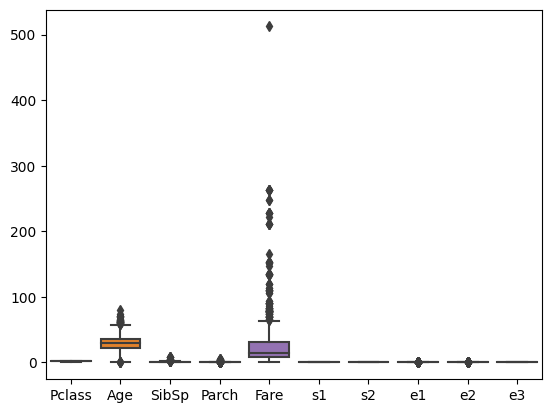

In [ ]:
# To find the outlier, we use boxplot
import seaborn as sns
sns.boxplot(data = X_train)

<Axes: >

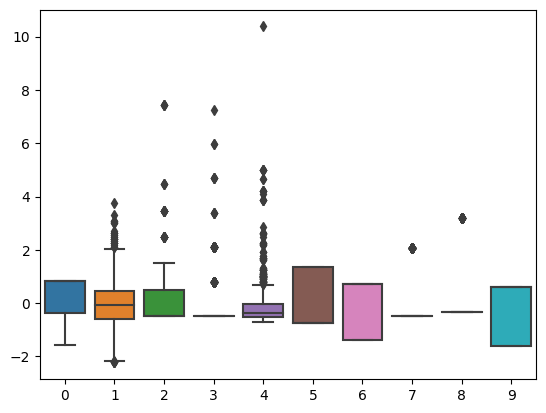

In [ ]:
# From boxplot we came to conclusion that the data has huge outliers. So we have to scale them using standard scaler
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
sns.boxplot(data = X_train)

In [ ]:
X_test = SS.transform (X_test)

In [ ]:
# Now we are going to apply different machine learning algorithms so that we can find which one has highest accuracy.
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score_logreg = logreg.score(X_test, y_test)
score_logreg

0.7988826815642458

K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7821229050279329

Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state = 0)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svc, X_train, y_train, cv=5)
cv_scores

array([0.76923077, 0.85314685, 0.84507042, 0.88028169, 0.83098592])

In [ ]:
cv_scores.mean()

0.8357431301093273

In [ ]:
cv_scores.std()

0.036932631993378734

In [ ]:
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.776536312849162

Decsion Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)

In [ ]:
train_score

0.9831460674157303

In [ ]:
test_score

0.7597765363128491

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 2, random_state = 42)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.7821229050279329

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 42)
gbc.fit(X_train,y_train)
gbc.score(X_test, y_test)

0.7932960893854749